# Motor de corrent continu d'imants permanents

## Condicions nominals

Podem representar la versió més senzilla d'aquest motor amb el següent esquema:

![](img/MaqElec/schrotor.png)

Apliquem la llei de Kirchoff de les malles:

$\Large U - \varepsilon = I \cdot r \Rightarrow I = \frac{U-\varepsilon}{r} $

Es a dir, tindrem una potència mecànica útil $P_u = \varepsilon \cdot I$ i una dissipació de calor $P_q = I^2 \cdot r$

Efectivament, dividint entre si les equacions fonamentals dels motors

$ \varepsilon = k \cdot \Phi \cdot \omega$

$ \Gamma = k \cdot \Phi \cdot I$

obtenim

$ \frac{\varepsilon}{\Gamma}  =  \frac{\omega }{I} \Rightarrow \varepsilon \cdot I = \Gamma \cdot \omega = P_u $

## Inversió de gir

Cal invertir la polaritat de la font d'alimentació

## Comportament a l'engegada

Hem de fixar-nos que en l'engegada el motor consemeix una intensitat $I_a$ molt superior:

$\varepsilon \cdot I = \Gamma \cdot \omega $

$\Large \omega = 0 \Rightarrow \varepsilon = 0 \Rightarrow I_a = \frac{U}{r}$

Per evitar això i mantenir l'intensitat d'engegada entre 1,5 i 2,5 vegades la intensitat nominal (es considera un sistema en curtcircui si el seu consum supera 3 vegades la intensitat nominal) es pot connecta una resistèncio variable $R_a$ en sèrie amb el motor, i que s'anula quan el motor ja ha engegat: 

![](img/MaqElec/schrotor2.png)

A l'engegada la intensitat val:

$\Large U - \varepsilon = I_a \cdot (r + R_a) \Rightarrow I_a = \frac{U-\varepsilon}{r + R_a} $

Si anomenem $I_n$ el valor de la intensitat en condicions nominals, es pren un valor de $R_a$ tal que 

$I_a = \alpha \cdot I_n$ 

$1,5 \le \alpha \le 2,5$



Si escrivim l'equació del moment per l'engegada i les condicions nominals i les dividim:

$ \Gamma_a = k \cdot \Phi \cdot I_a$

$ \Gamma_n = k \cdot \Phi \cdot I_n$

$\Large \frac{\Gamma_a}{\Gamma_n}  = \frac{I_a}{I_n} \Rightarrow  \Gamma_a = \frac{I_a}{I_n} \cdot \Gamma_n = \alpha \cdot \Gamma_n$

Es a dir, si dupliquem la intensitat a l'engegada també dupliquem el parell

## Pèrdues a les escombretes. Potencial de contacte

De vegades no poden considerar negligibles les pèrdues a les escombretes, especialment si fem servir contactes de grafit, ja que apareix un potencial de contacte que provoca pèrdues.

En aquest cas l'equació del motor s'expressa, en la forma més generalitzada:

$\Large U - \varepsilon - 2 \cdot V_{co}= I \cdot (r + R_a) \Rightarrow I = \frac{U-\varepsilon - 2 \cdot V_{co}}{r + R_a} $

Per simplificar les explicacions, considerarem negligibles les pèrdues a les escombretes en els següents capítols.


## Corbes característiques

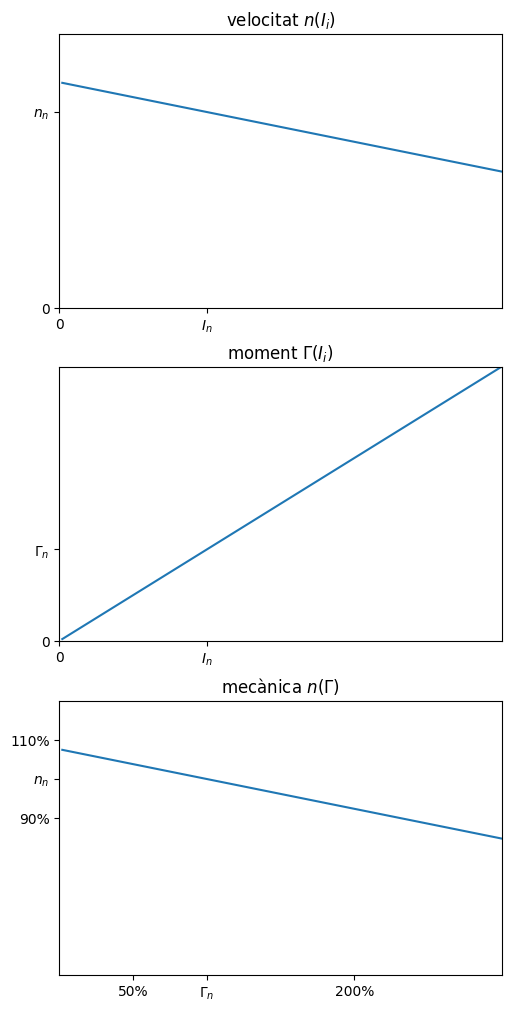

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
Pn=250
In=6
En=Pn/In
Un=48
nn=3340
r=(Un-En)/In
wn=nn*2*pi/60
kphi=En/wn
etan=Pn/(In*Un)
gn=kphi*In
x = np.linspace(0.02, 3, 300)
I = x*In
g = kphi*I 
e = Un-I*r
w = e/kphi
eta=e/Un

fig, axs = plt.subplots(3, 1, figsize=(5, 10), layout='constrained')

axs[0].plot(I/In, w/wn)
axs[0].axis([0, 3, 0, 1.4])
axs[0].set_xticks([0,1], ['0','$I_n$'])
axs[0].set_yticks([0,1], ['0','$n_n$'])
axs[0].set_title('velocitat $n(I_i)$')

axs[1].plot(I/In, g/gn)
axs[1].axis([0, 3, 0, 3])
axs[1].set_xticks([0,1], ['0','$I_n$'])
axs[1].set_yticks([0,1], ['0','$\Gamma_n$'])
axs[1].set_title('moment $\Gamma(I_i)$')

axs[2].plot(g/gn, w/wn)
axs[2].axis([0, 3, 0, 1.4])
axs[2].set_yticks([0.8,1,1.2], ['90%','$n_n$','110%'])
axs[2].set_xticks([0.5,1,2], ['50%','$\Gamma_n$','200%'])
axs[2].set_title('mecànica $n(\Gamma)$')

plt.show()


## Aplicacions

Com veiem aquest motor té un bon comportment: la variació de la càrrega només modifica lleugerament la velocitat, desenvolupant un parell proporcional al corrent. L'utilització dels imants permanents a l'estator permet fer motors petits i lleugers, encara que no molt potents.


## Rendiment

Aquest motor té un rendiment nominal:

$$\Large \eta = \frac{P_u}{P_c} = \frac{\varepsilon \cdot I}{U \cdot I} = \frac{\varepsilon}{U}$$

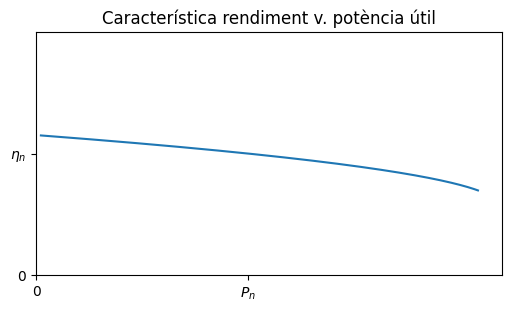

In [2]:
p=I*e

fig, ax = plt.subplots(1, 1, figsize=(5, 3), layout='constrained')

ax.plot(p/Pn, eta/etan)
ax.axis([0, 2.2, 0, 2])
ax.set_xticks([0,1], ['0','$P_n$'])
ax.set_yticks([0,1], ['0','$\eta_n$'])
ax.set_title('Característica rendiment v. potència útil')

plt.show()

## Exemple

**PAU ELECTROTÈCNIA 2015 S2 3B**

![](img/MaqElec/PAUEL2015S2P3B.png)

a)

In [3]:
P=250
U=48
I=6
eta=P/(U*I)
eta

0.8680555555555556

$\eta = 86,81\%$

b)

In [4]:
from math import pi
n=3340
omega=n*2*pi/60
gamma=P/omega
gamma

0.714767708496536

$\Gamma = 0,7148 Nm$

c)

De les condicions nominals:

$P = \varepsilon \cdot I \Rightarrow \varepsilon = \frac{P}{I}$

$U - \varepsilon = I \cdot r \Rightarrow r = \frac{ U-\varepsilon }{I}$

In [5]:
epsilon=P/I
r=(U-epsilon)/I
r

1.055555555555556

En la nova situació, com es conserva el parell nominal el motor consumira la intensitat nominal:

$U_2 - \varepsilon_2 = I \cdot r \Rightarrow \varepsilon_2 = U_2 - I \cdot r $

In [6]:
U2=37
epsilon2=U2-I*r
epsilon2

30.666666666666664

Si escrivim l'equació de la força contraelectromotriu per la nova situació i les condicions nominals i les dividim:

$ \varepsilon_2 = k \cdot \Phi \cdot \omega_2$

$ \varepsilon = k \cdot \Phi \cdot \omega$

$\Large \frac{\varepsilon_2 }{\varepsilon } = \frac{\omega_2}{\omega } = \frac{n_2}{n}$

$\Large \Rightarrow n_2 = \frac{\varepsilon_2 }{\varepsilon } \cdot n$

In [7]:
n2=epsilon2/epsilon*n
n2

2458.24

la nova velocitat serà de $2458  min^{-1}$